# Inaugural Project

In this project we want to solve the Labor Supply Problem given the following maximization problem of a consumer:

$$c^*,l^* = \arg \max_{c,l} \log(c)-v\frac{l^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}$$
s.t. 
$$x = m+wl-[\tau_0 wl+\tau_1 \max\{wl-\kappa,0\}]$$
$$ c \in [0,x]$$
$$ l \in [0,1],$$

where $c$ is consumption, $l$ is labor supply, $m$ is cash-on-hand, $w$ is the wage rate, $\tau_0$ is the standard labor income tax, $\tau_1$ is the top bracket labor income tax, $\kappa$ is the cut-off for the top labor income bracket, $x$ is total resources, $v$ scales the disutility of labor, and $\epsilon$ is the Frisch elasticity of labor supply. Furthermore we note that utility is monotonically increasing in consumption, which imlplies that $c^* = x$.

Import and set magics:

In [82]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import math

## Question 1

First of all we begin this project by importing the packages that we will use. The parameter values are then defined as given in the project describtion. We solve the maximization problem given the parameter values. The optimal level of consumption and labor are c = 1.24 and l = 0.40 which gives us a utility of 0.17.

In [83]:
# First the initial variables that are subject to change are defined
w = 1
e = 0.3

# The fixed parameter values are
m = 1
v = 10
t0 = 0.4
t1 = 0.1
k = 0.4

# Now we construct the functions
def c_star(w,l,m,t0,t1,k):
    return m+w*l-(t0*w*l+t1*max(w*l-k,0))

def u_star(c,l,v,e):
    return np.log(c)-v*l**(1+1/e)/(1+1/e)

# Objective function
def value_of_choice(l,v,e):
    c = c_star(w,l,m,t0,t1,k)
    return -u_star(c,l,v,e)

# Call solver
sol_case1 = optimize.minimize_scalar(
    value_of_choice,method='bounded',
    bounds=(0,1),args=(v,e))

# Unpack solution
l = sol_case1.x
c = c_star(w,l,m,t0,t1,k)
u = u_star(c,l,v,e)

# Print solutions
def print_solution(c,l,u):
    print(f'c = {c:0.2f}')
    print(f'l = {l:0.2f}')
    print(f'u = {u:0.2f}')
    
print_solution(c,l,u)

c = 1.24
l = 0.40
u = 0.17


## Question 2

I this question we want to show consumption and labor as functions of wage. Overall both consumption and labor are increasing in wages which is what we expected beforehand. 

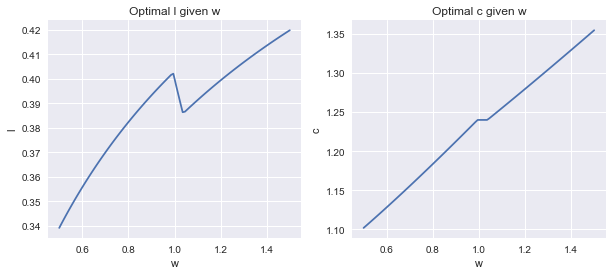

In [84]:
# Optimal choice as function of wage
l_val = []
c_val = []
w_val = []

for i in np.linspace(0.5,1.5,100):
    w = i

    sol_case1 = optimize.minimize_scalar(value_of_choice,
    method='bounded',
    bounds=(0,1),args=(v,e))
    
    w_val.append(i)
    l_val.append(sol_case1.x)
    c_val.append(c_star(sol_case1.x,i,m,t0,t1,k))


c_val
l_val
w_val

# Figure

plt.style.use("seaborn")

# Creating the figure
fig = plt.figure(figsize=(10,4))

# The left plot
ax_left = fig.add_subplot(1,2,1)

ax_left.plot(w_val,l_val)

ax_left.set_title('Optimal l given w')
ax_left.set_xlabel('w')
ax_left.set_ylabel('l')
ax_left.grid(True)

# The right plot
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(w_val,c_val)

ax_right.set_title('Optimal c given w')
ax_right.set_xlabel('w')
ax_right.set_ylabel('c')
ax_right.grid(True)

## Question 3

Now we run the utility function for 10.000 individuals with a uniform wage distribution between 0.5 and 1.5, where the elasticity of labor supply is 0.3. This gives us a total tax revenue of 1629.3.

In [90]:
# Drawing a random number
np.random.seed(117)
c_i = []
l_i = []
w_i = []

# Drawing a random wage for each i in the population with 10.000 individuals
for i in range(10000):
    w = np.random.uniform(low=0.5,high=1.5)

    sol_case1 = optimize.minimize_scalar(value_of_choice,
    method='bounded',
    bounds=(0,1),args=(v,e))

    c_i.append(c_star(sol_case1.x,w,m,t0,t1,k))
    l_i.append(sol_case1.x)
    w_i.append(w)

def tax_func(l,w,t0,t1,k):
    return t0*w*l+t1*max(w*l-k,0)


def tax_rev(l,w,t0,t1,k):
    tax = 0
    for i in range(10000):
        tax += tax_func(l_i[i],w_i[i],t0,t1,k)
    return tax

print(f'The tax revenue with e = 0.3 is {tax_rev(l_i[i],w_i[i],t0,t1,k):.4f}') 

The tax revenue with e = 0.3 is 1629.3305


## Question 4

We do the same as in Question 3 with a lower elasticity of labor supply being 0.1. This gives a higher tax revenue of 3195.2. 

In [88]:
# Defining the new elasticity of labor supply
e_new = 0.1

sol_case2 = optimize.minimize_scalar(value_of_choice,
    method='bounded',
    bounds=(0,1),args=(v,e_new))

# Drawing a random number
np.random.seed(117)
c_i_new = []
l_i_new = []
w_i_new = []

# Drawing a random wage for each i in the population with 10.000 individuals
for i in range(10000):
    w = np.random.uniform(low=0.5,high=1.5)

    sol_case2 = optimize.minimize_scalar(value_of_choice,
    method='bounded',
    bounds=(0,1),args=(v,e_new))

    c_i_new.append(c_star(sol_case2.x,w,m,t0,t1,k))
    l_i_new.append(sol_case2.x)
    w_i_new.append(w)

def tax_rev_new(l,w,t0,t1,k):
    tax_new = 0
    for i in range(10000):
        tax_new += tax_func(l_i_new[i],w_i_new[i],t0,t1,k)
    return tax_new

print(f'The tax revenue with e = 0.1 is {tax_rev_new(l_i_new[i],w_i_new[i],t0,t1,k):.4f}') 

The tax revenue with e = 0.1 is 3195.2279


## Question 5

To give a suggestion to the politician of how she maximizes the tax revenue, we maximize our tax revenue function from question 3 with respect to $\tau_0$, $\tau_1$ and $\kappa$ through the following code:

In [91]:
def tax(x):
    tau0 = x[0]
    tau1 = x[1]
    w = x[2]
    l = x[3]
    k = x[4]
    
    tax_rev = np.sum(tau0*w*l+tau1*max(l*w-k,0))
    return tax_rev

def con_func(x):
    con = m*x[2]*x[3]-(x[0]*x[3]*x[2]+x[1]*max(x[2]*x[3]-x[4],0))
    return con

def opt_tax(x):
    return -tax(x)

x0 = [0.75,0.1,0.01,1,1] 
bounds = ((0,1),(0,1),(0,1),(0.5,1.5),(0,1))
con_val = ({"type":"ineq","fun":con_func})

tax_rev_opt = optimize.minimize(opt_tax,x0,bounds=bounds,constraints=con_val,method='SLSQP')

tau0_opt = tax_rev_opt.x[0]
tau1_opt = tax_rev_opt.x[1]
k_opt = tax_rev_opt.x[4]


print(f'We suggest tau_0 to be {tau0_opt:.4f} tau_1 to be {tau1_opt:.4f} and kappa to be {k_opt:.4f}')

We suggest tau_0 to be 0.9050 tau_1 to be 0.2353 and kappa to be 0.8946


In [92]:
print(f'The maximum tax revenue is {tax_rev(l_i[i],w_i[i],tau0_opt,tau1_opt,k_opt):.4f}')

The maximum tax revenue is 3567.6785


We see that the total tax revenue is now 3567.68 compared to 1629.33 in question 3. As we know from the Laffer curve the tax revenue will increase with a higher tax until a certain point where the tax revenue will fall again if the tax is raised further. However, we do think that an income tax of 90 pct. seems a bit too high for this answer to be realistic. 